In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score, roc_curve 
import random


In [5]:
np.random.seed(42)
random.seed(42)


In [6]:
df = pd.read_csv('creditcard.csv')


In [7]:
df.head(10)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [8]:
df.shape
rows = df.shape[0]
cols = df.shape[1]
print("Rows:", rows)
print("Columns:", cols)


Rows: 284807
Columns: 31


In [9]:
#  1: VERİ ÖN İŞLEME
print("1: Veri Ön İşleme ")

# 1.1 Missing Value Cleaning
print(f"Eksik veri sayısı: {df.isnull().sum().max()}")
df = df.dropna() 

# 1.2 normalizasyon 
# Scaling 'Amount' using Z-score normalization
amount_mean = df['Amount'].mean()
amount_std = df['Amount'].std()
df['Amount_Scaled'] = (df['Amount'] - amount_mean) / amount_std

print(" 'Amount' sütunu normalize edildi.")

1: Veri Ön İşleme 
Eksik veri sayısı: 0
 'Amount' sütunu normalize edildi.



--- Step 2: Özellik Seçimi  ---


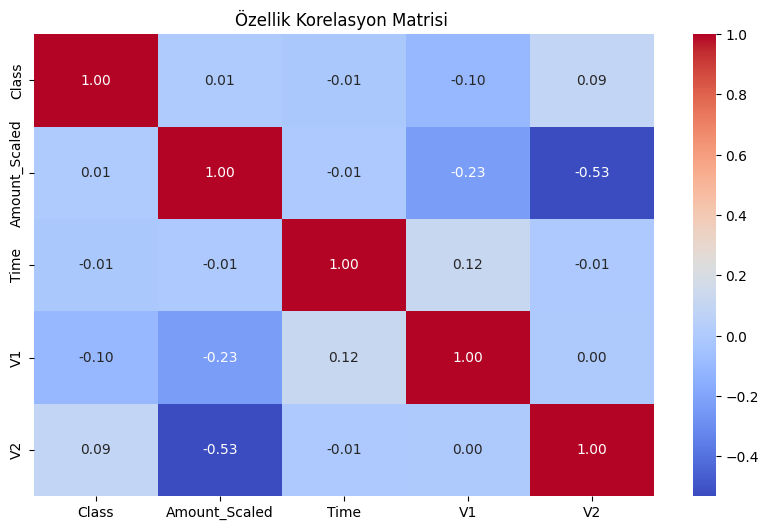

 'Time' ve ham 'Amount' çıkarıldı. V1-V28 ve 'Amount_Scaled' kullanılacak.

--- Sınıf Dengesizliği Analizi (Class Imbalance Analysis) ---
Normal İşlemler (Class 0): 284315 (99.83%)
Sahtekarlıklar  (Class 1): 492 (0.17%)


C:\Users\ok\AppData\Local\Temp\ipykernel_10600\3291810496.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=df_final, palette='pastel')


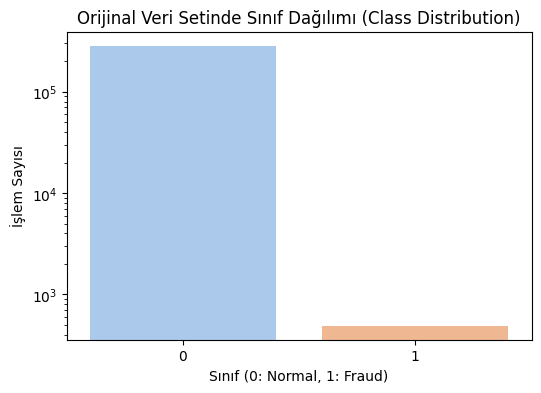

 Not: Sınıf dağılımındaki bu dengesizlik, modelin 'her şeye normal' demesine yol açabilir.


In [10]:
#  2: ÖZELLİK SEÇİMİ
print("\n--- Step 2: Özellik Seçimi  ---")

# Correlation Matrix 
plt.figure(figsize=(10, 6))
correlation_matrix = df[['Class', 'Amount_Scaled', 'Time', 'V1', 'V2']].corr() 
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Özellik Korelasyon Matrisi ")
plt.show()

# Decision: Drop 'Time' and original 'Amount'
df_final = df.drop(['Time', 'Amount'], axis=1)
print(" 'Time' ve ham 'Amount' çıkarıldı. V1-V28 ve 'Amount_Scaled' kullanılacak.")

# Show Imbalance Before Fixing It 
print("\n--- Sınıf Dengesizliği Analizi (Class Imbalance Analysis) ---")
counts = df_final['Class'].value_counts()
print(f"Normal İşlemler (Class 0): {counts[0]} ({counts[0]/len(df_final)*100:.2f}%)")
print(f"Sahtekarlıklar  (Class 1): {counts[1]} ({counts[1]/len(df_final)*100:.2f}%)")

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df_final, palette='pastel')
plt.title('Orijinal Veri Setinde Sınıf Dağılımı (Class Distribution)')
plt.xlabel('Sınıf (0: Normal, 1: Fraud)')
plt.ylabel('İşlem Sayısı')
plt.yscale('log') 
plt.show()
print(" Not: Sınıf dağılımındaki bu dengesizlik, modelin 'her şeye normal' demesine yol açabilir.")

In [11]:
import numpy as np

# Karışık indeksler
np.random.seed(42)
indices = np.random.permutation(len(df_final))

train_size = int(0.8 * len(df_final))
train_idx = indices[:train_size]
test_idx  = indices[train_size:]

train_df = df_final.iloc[train_idx].reset_index(drop=True)
test_df  = df_final.iloc[test_idx].reset_index(drop=True)

print("Train boyutu:", train_df.shape)
print("Test  boyutu:", test_df.shape)


Train boyutu: (227845, 30)
Test  boyutu: (56962, 30)


In [12]:
# Train set üzerinde undersampling
fraud_train  = train_df[train_df['Class'] == 1]
normal_train = train_df[train_df['Class'] == 0]

normal_train_undersampled = normal_train.sample(n=len(fraud_train), random_state=42)

balanced_train_df = pd.concat([fraud_train, normal_train_undersampled])
balanced_train_df = balanced_train_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Dengelenmiş train set boyutu:", balanced_train_df.shape)


Dengelenmiş train set boyutu: (774, 30)


In [13]:
# Eğitim verisi (dengelenmiş)
X_train = balanced_train_df.drop('Class', axis=1).values
y_train = balanced_train_df['Class'].values

# Test verisi (orijinal, dengesiz)
X_test = test_df.drop('Class', axis=1).values
y_test = test_df['Class'].values


In [20]:
np.savez("preprocessed_data.npz",
         X_train=X_train,
         y_train=y_train,
         X_test=X_test,
         y_test=y_test)


In [14]:
print(" 3: Sınıflandırma Algoritması")

class LogisticRegressionFromScratch:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.lr = learning_rate
        self.iters = iterations
        self.weights = None
        self.bias = None
        self.cost_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.iters):
            # Linear model
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Cost (log-loss)
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
            cost = - (1/n_samples) * np.sum(
                y * np.log(y_pred_clipped) + (1 - y) * np.log(1 - y_pred_clipped)
            )
            self.cost_history.append(cost)

    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)

    def predict(self, X, threshold=0.5):
        y_pred_prob = self.predict_proba(X)
        return [1 if p > threshold else 0 for p in y_pred_prob]


 3: Sınıflandırma Algoritması


In [15]:
print(" 4: Hiperparametre Seçimi (LR, Iteration, Threshold) ")

learning_rates = [0.001, 0.01, 0.1]
iteration_options = [500, 1000, 2000]
thresholds = [0.3, 0.5, 0.7]

best_params = None
best_acc = 0
best_model = None

for lr in learning_rates:
    for it in iteration_options:
        for th in thresholds:
            print(f"\nTesting: LR={lr}, Iterations={it}, Threshold={th}")

            # Train model
            model = LogisticRegressionFromScratch(learning_rate=lr, iterations=it)
            model.fit(X_train, y_train)

            # Predict with threshold
            preds = model.predict(X_test, threshold=th)
            acc = np.mean(preds == y_test)

            print(f"Accuracy -> {acc:.4f}")

            # Store best combination
            if acc > best_acc:
                best_acc = acc
                best_params = (lr, it, th)
                best_model = model

print("\nBest Hyperparameters Found:")
print(f"  Learning Rate: {best_params[0]}")
print(f"  Iterations: {best_params[1]}")
print(f"  Threshold: {best_params[2]}")
print(f"  Best Accuracy: {best_acc:.4f}")


 4: Hiperparametre Seçimi (LR, Iteration, Threshold) 

Testing: LR=0.001, Iterations=500, Threshold=0.3
Accuracy -> 0.0018

Testing: LR=0.001, Iterations=500, Threshold=0.5
Accuracy -> 0.7915

Testing: LR=0.001, Iterations=500, Threshold=0.7
Accuracy -> 0.9969

Testing: LR=0.001, Iterations=1000, Threshold=0.3
Accuracy -> 0.0018

Testing: LR=0.001, Iterations=1000, Threshold=0.5
Accuracy -> 0.8378

Testing: LR=0.001, Iterations=1000, Threshold=0.7
Accuracy -> 0.9901

Testing: LR=0.001, Iterations=2000, Threshold=0.3
Accuracy -> 0.0358

Testing: LR=0.001, Iterations=2000, Threshold=0.5
Accuracy -> 0.8820

Testing: LR=0.001, Iterations=2000, Threshold=0.7
Accuracy -> 0.9869

Testing: LR=0.01, Iterations=500, Threshold=0.3
Accuracy -> 0.5014

Testing: LR=0.01, Iterations=500, Threshold=0.5
Accuracy -> 0.9354

Testing: LR=0.01, Iterations=500, Threshold=0.7
Accuracy -> 0.9841

Testing: LR=0.01, Iterations=1000, Threshold=0.3
Accuracy -> 0.7948

Testing: LR=0.01, Iterations=1000, Threshold=

In [16]:
best_lr, best_iterations, best_threshold = best_params
final_model = LogisticRegressionFromScratch(
    learning_rate=best_lr,
    iterations=best_iterations
)

final_model.fit(X_train, y_train)


In [17]:
# STEP 4: MODEL PERFORMANSI VE METRİKLER
# Accuracy, Precision, Recall, F1, ROC-AUC

print("4: Model Performansı Değerlendirme ")

y_pred = final_model.predict(X_test, threshold=best_threshold)
y_prob = final_model.predict_proba(X_test)


# A) Confusion Matrix Elements
TP = np.sum((y_test == 1) & (np.array(y_pred) == 1))
TN = np.sum((y_test == 0) & (np.array(y_pred) == 0))
FP = np.sum((y_test == 0) & (np.array(y_pred) == 1))
FN = np.sum((y_test == 1) & (np.array(y_pred) == 0))

4: Model Performansı Değerlendirme 


In [18]:
# B) Calculate Basic Metrics
accuracy = (TP + TN) / len(y_test)
precision = TP / (TP + FP) if (TP + FP) > 0 else 0
recall = TP / (TP + FN) if (TP + FN) > 0 else 0
f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1-Score:  {f1_score:.4f}")


Accuracy:  0.9969
Precision: 0.3594
Recall:    0.8762
F1-Score:  0.5097


ROC-AUC Score: 0.9773


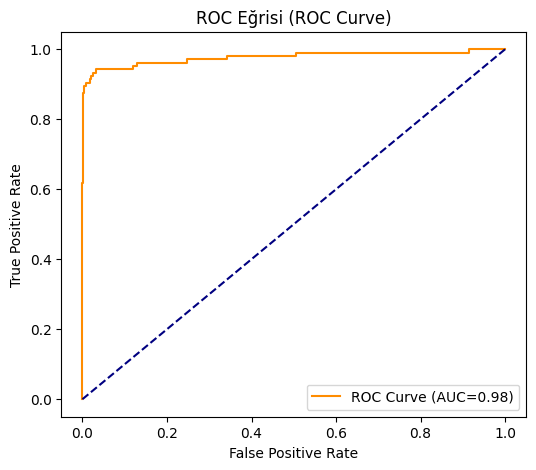

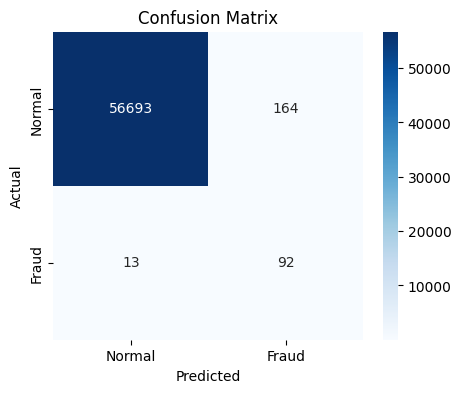

In [19]:
# C) ROC-AUC Calculation using sklearn
auc_score = roc_auc_score(y_test, y_prob)
fprs, tprs, thresholds = roc_curve(y_test, y_prob)

print(f"ROC-AUC Score: {auc_score:.4f}")

# Plot ROC Curve
plt.figure(figsize=(6, 5))
plt.plot(fprs, tprs, label=f'ROC Curve (AUC={auc_score:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi (ROC Curve)')
plt.legend(loc="lower right")
plt.show()

# Plot Confusion Matrix
cm = [[TN, FP], [FN, TP]]
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()